In [16]:
import numpy as np

from env import YoutubeEnv
import matplotlib.pyplot as plt

In [17]:
seed = 420
env = YoutubeEnv.random_env(evolutive = True, seed=seed)

In [18]:
env

In [19]:
u = env.users[0]
c = env.channels[0]
for v in c.videos:
    print("v = ", v)
    print(u.watch(v))

v =  <videos.Video object at 0x1616e27278>
sim :  0.33805889929944755
0.3856808694942903
v =  <videos.Video object at 0x1616e27390>
sim :  0.2618592974047941
0.23793813405878372
v =  <videos.Video object at 0x1616e273c8>
sim :  0.33805889929944755
0.24477105867021026


In [20]:
model_param = list(env.videos.values())

In [21]:
def thompson(nb_tries, cum_rewards, param):
    k = np.shape(nb_tries)[0]
    if param == "beta":
        # Beta prior
        try:
            samples = np.random.beta(cum_rewards + 1, nb_tries - cum_rewards + 1)
        except:
            samples = np.random.random(k)
    else:
        # Normal prior
        samples = np.random.normal(cum_rewards / (nb_tries + 1), 1. / (nb_tries + 1))
    return np.argmax(samples)

In [22]:
def get_reward(user, video):
    return user.watch(video)

In [28]:
def simulate(algo, model_param, user, param = None, time_horizon = 500):
    k = len(model_param)
    nb_tries = np.zeros(k, int)
    cum_rewards = np.zeros(k, float)
    action_seq = []
    reward_seq = []
    for t in range(time_horizon):
        a = algo(nb_tries, cum_rewards, param)
        r = get_reward(user, model_param[a])
        env.update(user, model_param[a], r)
        nb_tries[a] += 1
        cum_rewards[a] += r
        action_seq.append(a)
        reward_seq.append(r)
    index = np.where(nb_tries > 0)[0]
    best_action = index[np.argmax(cum_rewards[index] / nb_tries[index])]
    print("Best action (estimation) = ", best_action)
    print("Average reward of this action = ", cum_rewards[best_action] / nb_tries[best_action])
    return action_seq, reward_seq

In [29]:
def get_best_action(user, model_param):
    best_action, best_reward = (0, 0)
    for i in range(len(model_param)):
        rew = user.watch(model_param[i])
        if rew > best_reward:
            best_action = i
            best_reward = rew
    return best_action, best_reward

In [30]:
def get_regret(action_seq, reward_seq, best_actions, best_reward):
    time_horizon = len(action_seq)
    regret = np.zeros(time_horizon, float)
    precision = np.zeros(time_horizon, float)
    for t in range(time_horizon):
        regret[t] = best_reward - reward_seq[t]
    return np.cumsum(regret), precision

In [31]:
def show_metrics(metrics, time_horizon):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Regret')
    ax1.plot(range(time_horizon),metrics[0], color = 'b')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Precision')
    ax2.set_ylim(-0.02,1.02)
    ax2.plot(range(time_horizon),metrics[1], color = 'b')
    plt.show()

sim :  0.3353074433201909
sim :  0.29038476399329616
sim :  0.583152358762023
sim :  0.3224054248957783
sim :  0.3051054876912167
sim :  1e-07
sim :  0.6772122788949343
sim :  0.34978478728923723
sim :  0.30292251164981576
sim :  1e-07
sim :  0.2732776443844902
sim :  0.3415434194516227
sim :  0.004056879710028771
sim :  0.6833490308362509
sim :  0.3549534067889608
sim :  0.3356237963111339
sim :  0.680776375410379
sim :  0.004949720484132114
sim :  0.3530830161983718
sim :  0.3530830161983718
sim :  0.6014387518453276
sim :  0.008203441978056225
sim :  0.35351823428562024
sim :  0.5913857626614372
sim :  0.6020539216121166
sim :  0.5869248178348081
sim :  0.32513304014326394
sim :  0.2951973956530052
sim :  0.018224829166351597
sim :  0.5837997640084052
sim :  0.357671947568309
sim :  0.5951344152564997
sim :  0.35200202733676345
sim :  0.5874631490350827
sim :  0.34621921957074053
sim :  0.35914742354482954
sim :  0.31293376279816254
sim :  0.36426480124743477
sim :  0.68071185377734

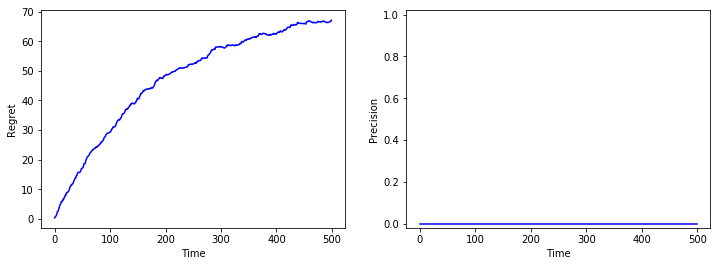

In [32]:
results = simulate(thompson, model_param, u)
regret = get_regret(*results, *get_best_action(u, model_param))
show_metrics(regret, 500)

In [89]:
get_best_action(u, model_param)

sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  0.3090032163838914
sim :  0.3090032163838914
sim :  0.2676046352395498
sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  0.33189012099727244
sim :  0.28742527604872903
sim :  0.33189012099727244
sim :  0.6663535951190471
sim :  0.5770791412761851
sim :  0.8161131481554004
sim :  1e-07
sim :  0.2676046352395498
sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  0.35735037873515574
sim :  0.35735037873515574
sim :  0.2768024131204343
sim :  0.35735037873515574
sim :  0.3094745060366353
sim :  0.25268487606320966
sim :  1e-07
sim :  1e-07
sim :  1e-07


(14, 0.765027136511629)